# Random Forests

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('penguins_simple.csv', sep=';')

In [3]:
train, test = train_test_split(df)

#### 1. Inspect the shape of the train and test DataFrames

In [4]:
train.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
304,Gentoo,45.5,14.5,212.0,4750.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
96,Adelie,37.7,16.0,183.0,3075.0,FEMALE
169,Chinstrap,50.6,19.4,193.0,3800.0,MALE
268,Gentoo,45.0,15.4,220.0,5050.0,MALE


In [5]:
train.shape

(249, 6)

### Train a Baseline Model

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
# we can extract columns only now, because we want to sample below
Xtrain = train[['Flipper Length (mm)', 'Culmen Length (mm)']]
ytrain = train['Species']
Xtest = test[['Flipper Length (mm)', 'Culmen Length (mm)']]
ytest = test['Species']

#### 2. Train a Decision Tree with maximum depth 4

In [8]:
m = DecisionTreeClassifier(max_depth=4)
m.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

#### 3. Calculate training and test accuracy

In [9]:
print('train acc', round(m.score(Xtrain,ytrain),3))
print('test acc', round(m.score(Xtest,ytest),3))

train acc 0.976
test acc 0.94


### Train a Random Forest from Scratch

#### 4. Build a list of trees

Repeat the following 100 times:
    
* draw 50 random penguins (with `df.sample()`)
* train a decision tree on the sample with `max_depth=3`
* add the tree to the forest

In [10]:
forest = []

for i in range(100):
    sample = train.sample(50) # method to take the sample
    X = sample[['Flipper Length (mm)', 'Culmen Length (mm)']]
    y = sample['Species']
    tree = DecisionTreeClassifier(max_depth=3)
    tree_f = tree.fit(X,y)
    forest.append(tree_f)
    

In [11]:
type(tree)


sklearn.tree._classes.DecisionTreeClassifier

#### 5. Calculate a list of training scores for all trees on the full training set

In [15]:
trainscores = [tree.score(Xtrain,ytrain) for tree in forest]
max(trainscores), min(trainscores)

(0.9558232931726908, 0.8072289156626506)

#### 6. Calculate the mean training score
is the mean score better or worse than the baseline?

In [16]:
print('mean train accuracy: ', round(sum(trainscores)/len(trainscores), 3))

mean train accuracy:  0.912


#### 7. Calculate the mean test score in the same way
is the mean score better or worse than the baseline?

In [17]:
testscores = [tree.score(Xtest,ytest) for tree in forest]
print('mean test accuracy: ', round(sum(testscores)/len(testscores), 3))

mean test accuracy:  0.892


### Majority Vote

#### 8. Create a list of predictions for every tree

In [18]:
preds = [tree.predict(Xtest) for tree in forest]
type(preds) #the result is a list of lists


list

#### 9. Convert the list into a DataFrame
Inspect the result

* The shape of the DF should be (100, 84)
* What do the dimensions of the DF mean?
* Do the trees predictions are in agreement?

In [19]:
all_preds = pd.DataFrame(preds)
all_preds.shape

(100, 84)

In [24]:
all_preds.head(3)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,Chinstrap,Adelie,Gentoo,Gentoo,Adelie,Adelie,Adelie,Chinstrap,Chinstrap,Gentoo,...,Adelie,Chinstrap,Gentoo,Gentoo,Chinstrap,Gentoo,Adelie,Gentoo,Adelie,Adelie
1,Chinstrap,Adelie,Gentoo,Gentoo,Adelie,Adelie,Adelie,Chinstrap,Gentoo,Gentoo,...,Adelie,Adelie,Gentoo,Chinstrap,Chinstrap,Gentoo,Adelie,Gentoo,Adelie,Gentoo
2,Chinstrap,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Adelie,Chinstrap,Gentoo,Chinstrap,...,Adelie,Adelie,Gentoo,Chinstrap,Chinstrap,Gentoo,Adelie,Gentoo,Adelie,Adelie


#### 10. Calculate accuracy from most frequent prediction on each data point
* Is the overall accuracy better than the accuracy of the baseline?
* Do you have more or less overfitting?

In [20]:
ypred = all_preds.mode().T[0] # here we take the vote between the results
print('majority vote test score:',accuracy_score(ypred,ytest)) # with the accuracy_score we compare result ith test

majority vote test score: 0.9523809523809523


## RandomForest with Scikit

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [37]:
importance = rf.feature_importances_

In [38]:
list(zip(importance,Xtrain.columns))

[(0.45074728130142566, 'Flipper Length (mm)'),
 (0.5492527186985743, 'Culmen Length (mm)')]

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Culmen Length (mm)'>

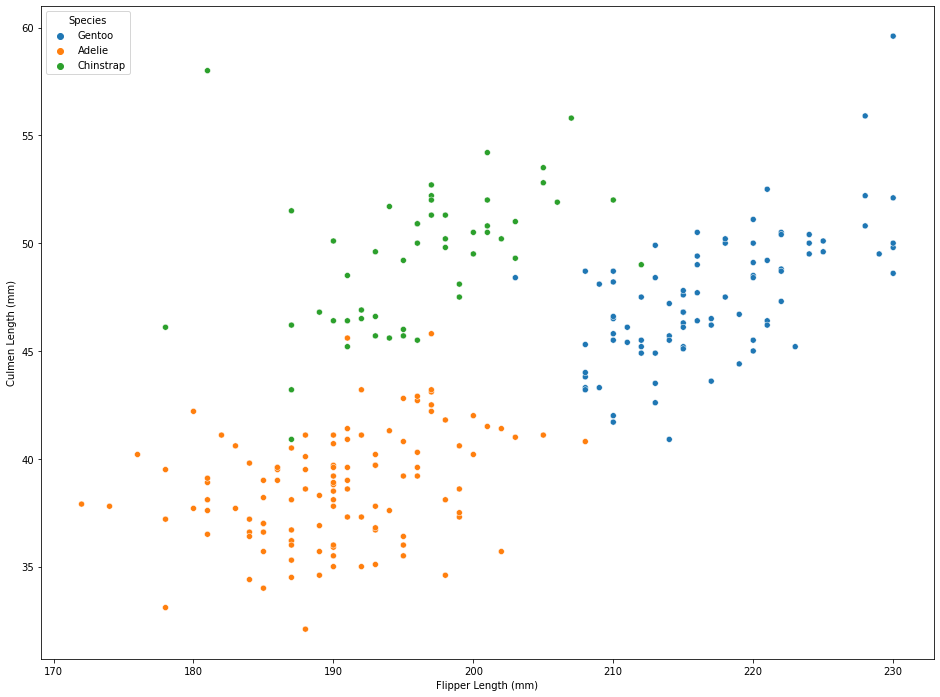

In [41]:
plt.figure(figsize=(16, 12))
import seaborn as sns
sns.scatterplot(x=Xtrain['Flipper Length (mm)'],y=Xtrain['Culmen Length (mm)'],hue = ytrain)
